https://www.kaggle.com/santoshd3/bank-customers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Churn Modeling.csv')
df = df.drop(['RowNumber', 'Surname'], axis=1)
df = df.set_index('CustomerId')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
sum(df['Exited'])

2037

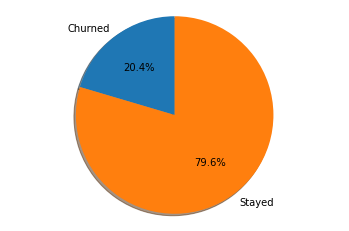

In [ ]:
labels = 'Churned', 'Stayed'
sizes = [2037, 7936]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
df_copy=df.copy()
df_copy

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
df.shape

(10000, 11)

In [ ]:
target = 'Exited'
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

#Data Cleaning

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Data Exploration

Percentage positive class

In [ ]:
sum(df[target])/len(df)

0.2037

In [ ]:
df.corrwith(df[target])

CreditScore       -0.027094
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

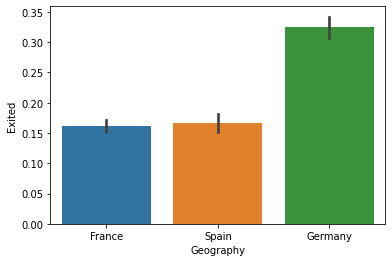

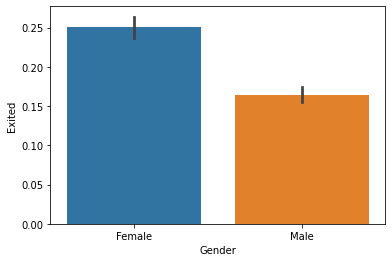

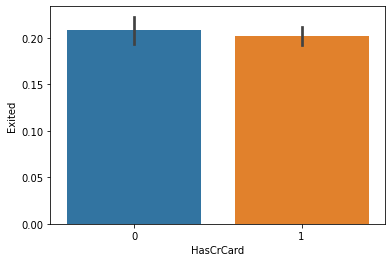

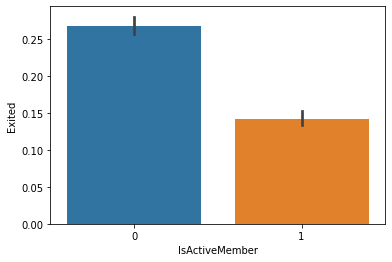

In [ ]:
for col in categorical_cols:
  plt.figure()
  sns.barplot(df[col], df[target])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

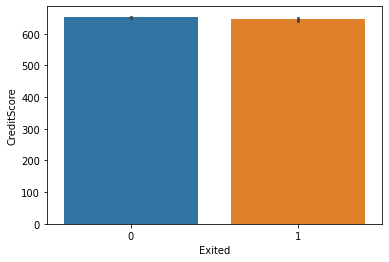

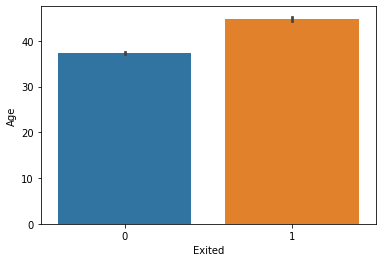

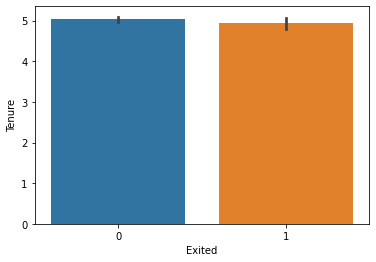

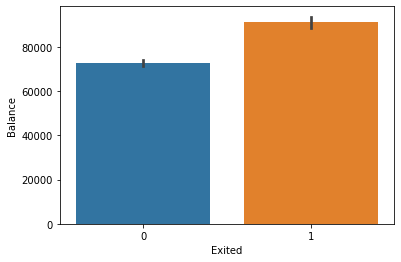

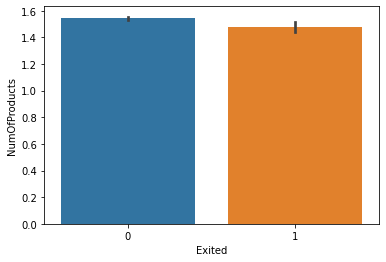

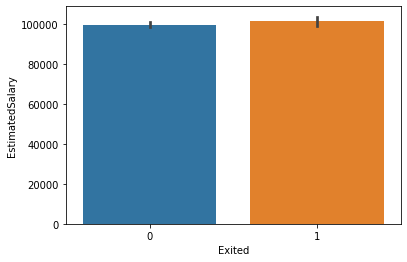

In [ ]:
for col in numeric_cols:
  plt.figure()
  sns.barplot(df[target], df[col])

Projected onto 2D Space

Text(0.5, 1.0, 'Who Churned?')

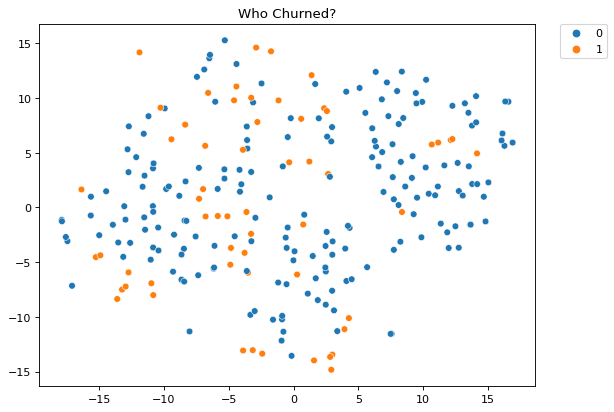

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder

graph_df = df[:250]

scaler = StandardScaler()
scaler.fit(graph_df[numeric_cols])
X_scaled = scaler.transform(graph_df[numeric_cols])

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(graph_df[categorical_cols])
X_one_hot = enc.transform(graph_df[categorical_cols])

X_enc = np.concatenate([X_scaled, X_one_hot], axis=1)

X_embedded = TSNE(n_components=2, random_state=7).fit_transform(X_enc)

plt.figure(figsize=(8, 6), dpi=80)
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:,1], hue=graph_df[target])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Who Churned?')

#Modeling

In [ ]:
#Encode Xs
X = df.drop([target], axis=1)
y = df[target]


scaler = StandardScaler()
scaler.fit(df[numeric_cols])
X_scaled = scaler.transform(df[numeric_cols])

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(df[categorical_cols])
X_one_hot = enc.transform(df[categorical_cols])

X_enc = np.concatenate([X_scaled, X_one_hot], axis=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, recall_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

def run_models(X_train, y_train, X_test, y_test):
  model_params = (
      (LogisticRegression(random_state=42), {}),
      (GaussianNB(), {}),
      (SVC(random_state=42), {
          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}),
      (KNeighborsClassifier(), {
          'n_neighbors': range(2, 11, 2), 
          'weights': ('uniform', 'distance')}),
      (DecisionTreeClassifier(random_state=42), 
      {'max_depth': (None, 5, 10, 20)}),
      (XGBClassifier(random_state=42), {},),
      (MLPClassifier(), 
      {'hidden_layer_sizes': ((100), (50, 50, 50), (5, 3), (3), (3, 3, 3))})
  )

  for model, params in model_params:
    gscv = GridSearchCV(model, params).fit(X_train, y_train)
    prediction = gscv.predict(X_test)
    print(model)
    print(recall_score(y_test, prediction))
    print('===========================================================================')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.33, random_state=42)

In [ ]:
#Without undersampling or oversampling
run_models(X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.2052877138413686
GaussianNB(priors=None, var_smoothing=1e-09)
0.4059097978227061
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
0.40902021772939345
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.41368584758942456
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.49300155520995337


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = undersampler.fit_resample(X_train, y_train)

run_models(X_under, y_under, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7107309486780715
GaussianNB(priors=None, var_smoothing=1e-09)
0.7076205287713841
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
0.7651632970451011
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.7558320373250389
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_fe

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.7480559875583204


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversampler.fit_resample(X_train, y_train)

run_models(X_over, y_over, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.7169517884914464
GaussianNB(priors=None, var_smoothing=1e-09)
0.7169517884914464
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
0.7542768273716952
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.49455676516329705
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_f

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.5489891135303266


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best model

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='majority')

X_under, y_under = undersampler.fit_resample(X_train, y_train)

model = XGBClassifier(random_state=42).fit(X_under, y_under)
probabilities = model.predict_proba(X_test) #These are the predicted probabilities of churning for each cus
probabilities

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[0.8412978 , 0.15870221],
       [0.87655807, 0.12344193],
       [0.747063  , 0.25293702],
       ...,
       [0.6550317 , 0.3449683 ],
       [0.44846982, 0.5515302 ],
       [0.10617256, 0.89382744]], dtype=float32)

In [ ]:
import pandas as pd

# cast churn outcome and probabilites to df
df = pd.DataFrame(y_test)
df[['Prob Exit','Prob Stay']] = probabilities


# save to xlsx file
filepath = 'Churn Model Prediction.csv'

df.to_csv(filepath, index=False)

In [ ]:
df_copy_balance=df_copy['Balance']

In [ ]:
df


,Exited,Prob Exit,Prob Stay
CustomerId,,,
15687492,0,0.841298,0.158702
15736963,0,0.876558,0.123442
15721730,0,0.747063,0.252937
15762134,0,0.432177,0.567823
15648898,0,0.726090,0.273910
...,...,...,...
15682533,0,0.476276,0.523724
15572114,0,0.603441,0.396559
15575623,0,0.655032,0.344968


In [ ]:
df=df.merge(df_copy_balance, left_index=True, right_index=True)

In [ ]:
df

,Exited,Prob Exit,Prob Stay,Balance
CustomerId,,,,
15687492,0,0.841298,0.158702,96709.07
15736963,0,0.876558,0.123442,0.00
15721730,0,0.747063,0.252937,0.00
15762134,0,0.432177,0.567823,119152.10
15648898,0,0.726090,0.273910,124995.98
...,...,...,...,...
15682533,0,0.476276,0.523724,79259.99
15572114,0,0.603441,0.396559,121629.22
15575623,0,0.655032,0.344968,110635.32


In [ ]:
df.sort_values(by='Prob Exit', ascending=False)

,Exited,Prob Exit,Prob Stay,Balance
CustomerId,,,,
15599792,0,0.981275,0.018725,0.00
15615330,0,0.975288,0.024712,0.00
15799932,0,0.974243,0.025757,0.00
15777217,0,0.973751,0.026249,0.00
15728906,0,0.972093,0.027908,0.00
...,...,...,...,...
15589017,1,0.002176,0.997824,111362.76
15692416,1,0.002162,0.997838,143542.36
15710087,1,0.001813,0.998187,125889.30


In [ ]:
filepath = 'Churn Model Prediction.csv'

df.to_csv(filepath, index=False)